https://towardsdatascience.com/6-hierarchical-datavisualizations-98318851c7c5

## Enclosed Tree Diagram

In [ ]:
%pip install anytree

In [13]:
import json
from anytree import PostOrderIter
from anytree.importer import DictImporter
import ipywidgets as widgets
import plotly.graph_objs as go
import pandas as pd
import plotly

In [7]:
with open('flare.json') as f:
   js_data = json.loads(f.read())

In [9]:
#imports dictonary in a tree form
importer = DictImporter()
root = importer.import_(js_data)


size = []
name = []
parent = []
level = []

In [10]:
def format(node):
  for i in node.children:
    #check if node as attribute value
    if hasattr(i, 'value') == False:
      format(i)
    v = i.value
    #check if node parent as attribute value
    if hasattr(i.parent, 'value'):
      i.parent.value += v
    #if node parent doesn't have a value set to same val as child
    elif hasattr(i.parent, 'value')== False:
      i.parent.value = v

    level.append(len(i.ancestors))
    name.append(i.name)
    parent.append(i.parent.name)
    size.append(i.value)

In [11]:
format(root)

#append attributes for root
level.append(0)
name.append(root.name)
parent.append("")
size.append(root.value)

#create df
df = pd.DataFrame()
df['parent'] = parent
df['name'] = name
df['value']= size
df['level'] = level

In [14]:
#slider funtion
def update(sliderVal):
  fig = plotly.graph_objs.Figure()
  fig.add_trace(plotly.graph_objs.Treemap(
      labels = df[df['level']<sliderVal]['name'],
      values = df[df['level']<sliderVal]['value'],
      parents = df[df['level']<sliderVal]['parent']  
  ))
  fig.update_traces(root_color="#f1f1f1")
  fig.update_layout(width = 900, height = 900)
  fig.show()

#create slider widget
widgets.interact(update, sliderVal = (0, 5))

interactive(children=(IntSlider(value=2, description='sliderVal', max=5), Output()), _dom_classes=('widget-int…

<function __main__.update(sliderVal)>

## Layered Diagram

In [18]:
%pip install PyQt5
%pip install pyqtgraph

Note: you may need to restart the kernel to use updated packages.


     -------------------------------------- 995.8/995.8 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import json
import networkx as nx
#from networkx import graphviz_layout
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm

from sklearn.preprocessing import normalize
from matplotlib.widgets import Button
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import Wedge


import sys
from PyQt5.QtWidgets import QDialog, QApplication, QPushButton, QVBoxLayout, QLabel, QComboBox, QStyleFactory, \
    QGridLayout, QSlider
import pandas as pd
import re
import pyqtgraph as pg
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from PyQt5.QtCore    import Qt
from PyQt5.uic.properties import QtWidgets, QtCore

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import random
from matplotlib.colors import Normalize

from matplotlib.figure import Figure
import math

from sklearn.preprocessing import normalize
from anytree import Node, RenderTree, AsciiStyle, PreOrderIter, PostOrderIter
from anytree.importer import DictImporter

In [20]:
#create graph
importer = DictImporter()
root = importer.import_(js_data )

children_curr = [root]
cols = {}
for j in children_curr:
    #print('y',j)
    c = 0
    for i in PostOrderIter(j):
        try :
            c += i.value
        except AttributeError:
            continue
    cols[j.name] = c
    try:
        #print((list(j.children)))
        children_curr+=(list(j.children))
    except:
        continue

node_lis = []
edge_lis = []
col_lis = []


#adds nodes vals and edge vals to lists for network
def parse_json(parent, data):
    curr = parent
    if curr != None:
        edge_lis.append((parent, data['name']))
   
    col_lis.append(cols[data['name']])
    node_lis.append(data['name'])
    if 'children' in data:
        for i in data['children']:
            parse_json(data['name'],i)
        
    else:
        return
  
parse_json(None, js_data)


G = nx.DiGraph()
G.add_nodes_from(node_lis)
G.add_edges_from(edge_lis)



sh = nx.shortest_path_length(G, 'flare')

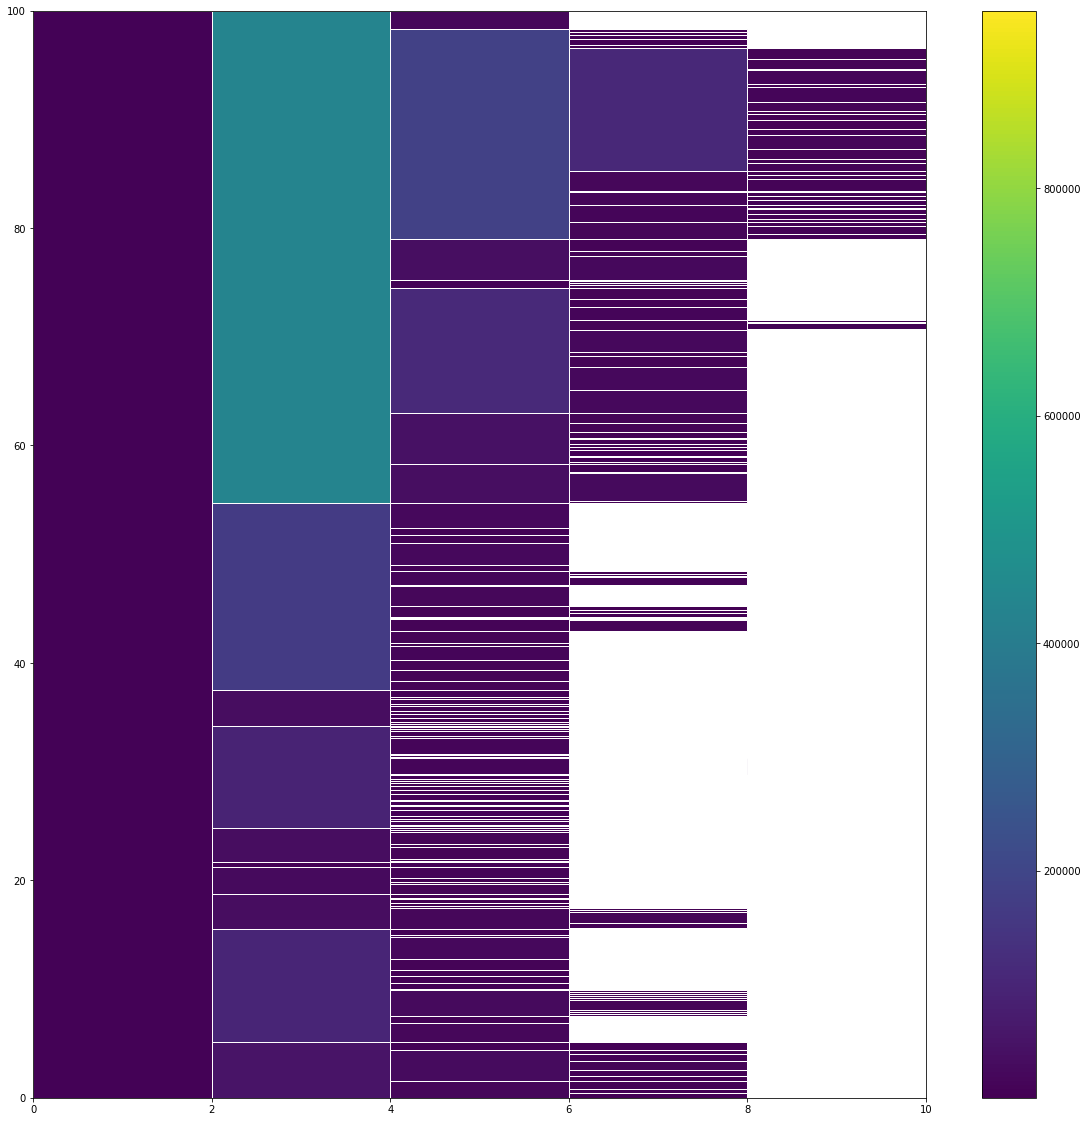

In [21]:
# #2
# #ADD LEGEND

#ENTER VALUE FROM 0-5
VALUE = 5


sh = nx.shortest_path_length(G, 'flare')
fig, ax = plt.subplots(figsize=(20,20))


plt.xlim([0, 10])
plt.ylim([0, 100])
sh = nx.shortest_path_length(G, 'flare')

importer = DictImporter()
root = importer.import_(js_data)
pat = {}
max_val = 956129
def parse_json2(parent, data, value):     
    curr = parent
    if sh[data.name] >= value:
        return
    if curr == None:
        ax.add_patch(Rectangle((0, 0), 2, 100, edgecolor= 'white', facecolor=cm.viridis(1)))
        pat[data.name]=[(0,0), 2, 100]
    elif curr !=None:

        gr_info_p = pat[parent]
        size_num_p = cols[parent]
        level = sh[parent]
        node_size = cols[data.name]
        x = (level + 1)*2
        size_perc = (cols[data.name]/max_val)*100
        y = gr_info_p[0][1] 
        ax.add_patch(Rectangle((x,y),2,size_perc, edgecolor ='white', facecolor=cm.viridis(node_size/max_val)))
        t = [(gr_info_p[0][0], gr_info_p[0][1]+size_perc), gr_info_p[1], gr_info_p[2]]
        pat[parent] = t
        pat[data.name] = [(x,y),2,size_perc]


   
    if len(data.children) == 0:
        return
    
    for i in data.children:

            parse_json2(i.parent.name,i, value)
            
    return 
  

parse_json2(None, root, VALUE)
c = plt.get_cmap("viridis")
m = ScalarMappable(Normalize(min(col_lis), max(col_lis)), c)

clb = plt.colorbar(m)

#legend
plt.show()

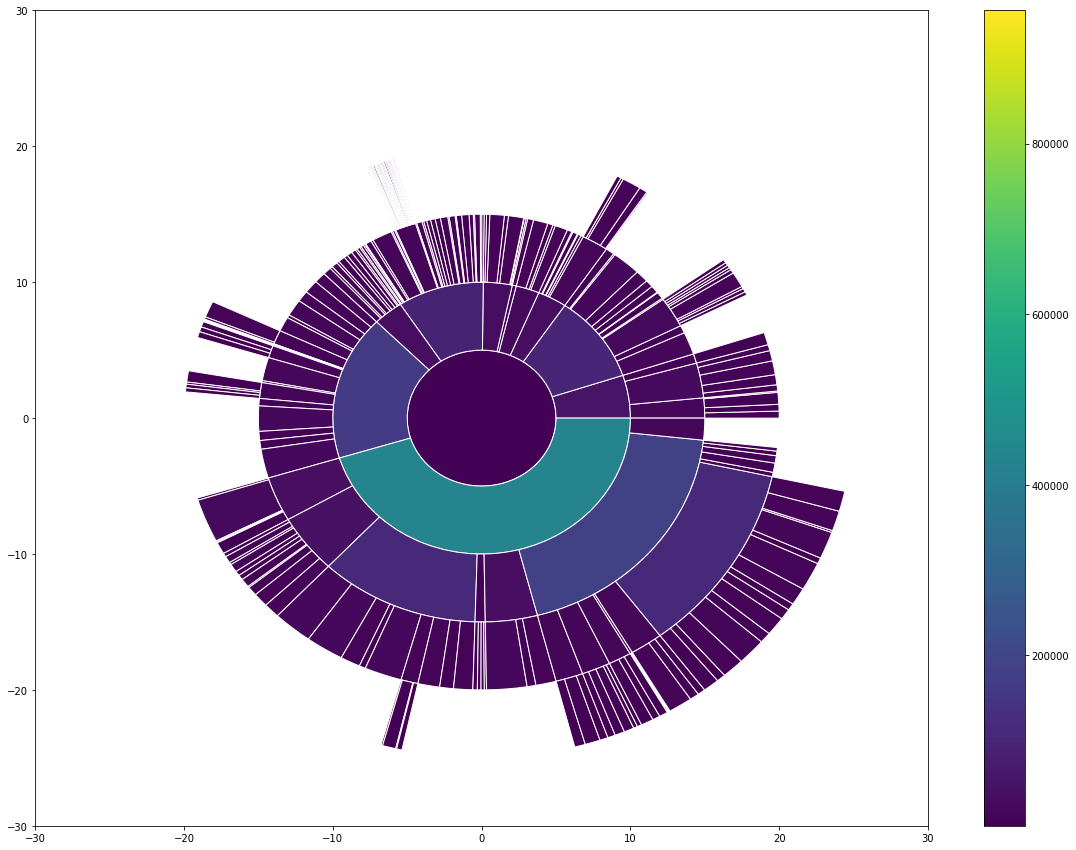

In [22]:
VALUE = 5
fig1, ax1 = plt.subplots(figsize=(20,15))


plt.xlim([-30, 30])
plt.ylim([-30, 30])
sh = nx.shortest_path_length(G, 'flare')



importer = DictImporter()
root = importer.import_(js_data)
pat = {}
max_val = 956129
d = 0
def parse_json3(parent, data, value):
    
    curr = parent
    
    if curr == None:
        ax1.add_patch(Circle((0, 0),radius=5,edgecolor= 'white', facecolor=cm.viridis(1)))
        pat[data.name]=0
    if sh[data.name] >= value:
        return

    elif curr !=None:

        deg_0 = pat[parent]
        size_num_p = cols[parent]
        level = sh[parent]
        node_size = cols[data.name]
        r = (level + 2)*5
        size_perc = (cols[data.name]/max_val)*360
        theta1 = deg_0
        theta2 = deg_0 + size_perc
        ax1.add_patch(Wedge((0, 0),r=r, theta1=theta1,theta2= theta2,edgecolor= 'white', facecolor=cm.viridis(node_size/max_val), width =5))
        pat[parent] = theta2
        pat[data.name] = theta1
   
    if len(data.children) == 0:
        return
    
    for i in data.children:
            parse_json3(i.parent.name,i, value)
            
   
    return 
  
parse_json3(None, root, VALUE)
c = plt.get_cmap("viridis")
m = ScalarMappable(Normalize(min(col_lis), max(col_lis)), c)

clb = plt.colorbar(m)

plt.show()

## Circle-packing

In [ ]:
%pip install circlify

In [ ]:
# import the circlify library
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    js_data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

In [ ]:
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))